In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import os


In [3]:
#import required libraries for CNN build
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv1D,MaxPool1D, Dropout, Add, BatchNormalization, ReLU, AveragePooling1D, Concatenate, Average
from tensorflow.keras import Model,Sequential
from tensorflow.keras.optimizers import Adam as adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,TerminateOnNaN,LearningRateScheduler
from tensorflow.keras.utils import plot_model
from sklearn import model_selection
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [4]:
# specifying the path to csv files

os.chdir('/content/gdrive/MyDrive/AI_project/')


In [5]:
# list of excel files we want to merge.
# pd.read_excel(file_path) reads the excel data into pandas dataframe.
df = pd.read_excel('wavenumber.xlsx')
df1= pd.read_excel('grade1.xlsx')
df2= pd.read_excel('grade2.xlsx')
df3= pd.read_excel('grade3.xlsx')
df4= pd.read_excel('grade4.xlsx')
df5= pd.read_excel('normal.xlsx')

In [6]:
df.columns=["wavenumber"]
df1.columns= [f"cell{i+1}g1" for i in range(len(df1.columns))]
df2.columns =[f"cell{i+1}g2" for i in range(len(df2.columns))]
df3.columns= [f"cell{i+1}g3" for i in range(len(df3.columns))]
df4.columns= [f"cell{i+1}g4" for i in range(len(df4.columns))]
df5.columns= [f"cell{i+1}norm" for i in range(len(df5.columns))]

In [7]:
#for i in range(1,len(.columns)+1):
 # x='"'+"cell"+str(i)+"norm"+'"'+','
  #print(x)

In [8]:
uResult = pd.concat([df, df1,df2,df3,df4,df5], axis=1)
uResult

,wavenumber,cell1g1,cell2g1,cell3g1,cell4g1,cell5g1,cell6g1,cell7g1,cell1g2,cell2g2,...,cell18norm,cell19norm,cell20norm,cell21norm,cell22norm,cell23norm,cell24norm,cell25norm,cell26norm,cell27norm
0,201.433,2.220446e-16,2.220446e-16,2.220446e-16,6.716886e+01,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,202.866,2.220446e-16,2.220446e-16,2.220446e-16,5.063976e+01,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2,204.299,5.392493e+00,1.558685e+01,1.584491e+00,3.511729e+01,2.220446e-16,7.869534e+00,2.220446e-16,2.220446e-16,2.220446e-16,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,205.732,1.250005e+01,2.568106e+01,1.445710e+00,1.903259e+01,9.455031e-01,2.027949e+01,2.220446e-16,2.220446e-16,2.220446e-16,...,0.0,0.000000,0.000000,24.192382,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,207.164,1.724569e+01,2.817929e+01,9.325067e-02,2.722214e+00,1.576463e+01,3.057998e+01,2.220446e-16,2.120995e+01,1.230474e+01,...,0.0,0.000000,0.000000,43.954666,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,3994.270,2.220446e-16,2.220446e-16,1.369729e+01,2.220446e-16,4.312363e+01,2.220446e-16,7.666778e+00,2.220446e-16,4.729692e+01,...,0.0,52.277408,58.391746,0.000000,66.127897,71.552720,1288.743810,0.0,17.747151,0.0
2648,3995.700,2.220446e-16,2.220446e-16,1.300243e+00,2.220446e-16,1.120874e+01,2.220446e-16,2.220446e-16,2.220446e-16,2.814075e+01,...,0.0,94.567413,100.557858,0.000000,51.037478,56.336547,1307.801459,0.0,0.000000,0.0
2649,3997.130,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,1.763127e+00,2.220446e-16,2.220446e-16,6.109669e+00,...,0.0,119.024285,124.881601,5.990443,29.309183,34.480145,1327.464875,0.0,0.000000,0.0
2650,3998.570,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,9.877087e+00,2.220446e-16,2.220446e-16,2.220446e-16,...,0.0,145.354658,151.073187,15.716297,7.052382,12.094009,1353.204388,0.0,0.000000,0.0


In [9]:
tResult = uResult.transpose() #transposed data
new_header = tResult.iloc[0] #grab the first row for the header
tResult = tResult[1:] #take the data less the header row
tResult.columns = new_header #set the header row as the df header
tResult.iloc[1,2].dtype #checking datatype


dtype('float64')

In [10]:
tResult.insert(0,'Class',np.zeros(241,float))
tResult


wavenumber,Class,201.433,202.866,204.299,205.732,207.164,208.597,210.03,211.463,212.896,...,3987.1,3988.54,3989.97,3991.4,3992.84,3994.27,3995.7,3997.13,3998.57,4000.0
cell1g1,0.0,2.220446e-16,2.220446e-16,5.392493e+00,12.500053,17.245687,2.013058e+01,2.148156e+01,2.060336e+01,1.627879e+01,...,31.881182,19.485975,2.709081,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
cell2g1,0.0,2.220446e-16,2.220446e-16,1.558685e+01,25.681065,28.179293,2.411621e+01,1.671858e+01,9.256451e+00,3.436716e+00,...,113.922676,81.920840,47.283899,1.766350e+01,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
cell3g1,0.0,2.220446e-16,2.220446e-16,1.584491e+00,1.445710,0.093251,2.220446e-16,1.049639e+00,5.172544e+00,1.062824e+01,...,62.966740,56.730609,44.781357,3.260543e+01,2.283625e+01,1.369729e+01,1.300243e+00,2.220446e-16,2.220446e-16,2.220446e-16
cell4g1,0.0,6.716886e+01,5.063976e+01,3.511729e+01,19.032591,2.722214,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,...,129.531757,107.886559,79.656685,4.484552e+01,7.636676e+00,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
cell5g1,0.0,2.220446e-16,2.220446e-16,2.220446e-16,0.945503,15.764627,3.136114e+01,4.986941e+01,7.148169e+01,9.248158e+01,...,120.733707,116.157134,108.178262,9.374254e+01,7.149034e+01,4.312363e+01,1.120874e+01,2.220446e-16,2.220446e-16,2.220446e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell23norm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,5.413202e+00,1.979072e+00,0.000000e+00,5.420899e+00,...,10.495779,41.492552,60.722168,7.033863e+01,7.800802e+01,7.155272e+01,5.633655e+01,3.448014e+01,1.209401e+01,0.000000e+00
cell24norm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.971605e+01,3.864470e+01,4.595974e+01,4.232914e+01,...,1282.686163,1288.546736,1279.409131,1.260444e+03,1.260894e+03,1.288744e+03,1.307801e+03,1.327465e+03,1.353204e+03,1.378973e+03
cell25norm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,27.005510,20.376533,6.264849,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
cell26norm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.576528e+01,4.995726e+01,8.051201e+01,...,19.427950,2.050947,0.000000,0.000000e+00,9.555046e+00,1.774715e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [11]:
for i in range(len(tResult.index)):
  if tResult.index[i][-1] == '1':
    tResult.iloc[i,0] = 1
  elif tResult.index[i][-1] == '2':
    tResult.iloc[i,0] = 2
  elif tResult.index[i][-1] == '3':
    tResult.iloc[i,0] = 3
  elif tResult.index[i][-1] == '4':
    tResult.iloc[i,0] = 4
  else:
    tResult.iloc[i,0] = 0
tResult.sample(20)



wavenumber,Class,201.433,202.866,204.299,205.732,207.164,208.597,210.03,211.463,212.896,...,3987.1,3988.54,3989.97,3991.4,3992.84,3994.27,3995.7,3997.13,3998.57,4000.0
cell2g4,4.0,9.384947e+00,1.969817e+01,3.347070e+01,4.177260e+01,3.811037e+01,2.978296e+01,1.115969e+01,2.220446e-16,2.220446e-16,...,40.835627,11.648769,2.220446e-16,2.220446e-16,4.177548e+00,5.412088e+01,8.415059e+01,4.316469e+01,2.220446e-16,2.220446e-16
cell39g4,4.0,2.880542e+01,2.000509e+01,1.034431e+01,2.388616e+00,2.220446e-16,2.220446e-16,6.602709e+00,1.589152e+01,1.974253e+01,...,24.477140,36.028838,4.787958e+01,4.289334e+01,2.382901e+01,2.323013e+01,1.699517e+01,3.471399e-01,2.220446e-16,2.220446e-16
cell34g4,4.0,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,5.382461e+01,1.178249e+02,1.620588e+02,1.667571e+02,1.479893e+02,...,132.066935,119.985590,1.249776e+02,1.286940e+02,1.247656e+02,1.100737e+02,6.840603e+01,2.220446e-16,2.220446e-16,2.220446e-16
cell23norm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.413202e+00,1.979072e+00,0.000000e+00,5.420899e+00,...,10.495779,41.492552,6.072217e+01,7.033863e+01,7.800802e+01,7.155272e+01,5.633655e+01,3.448014e+01,1.209401e+01,0.000000e+00
cell42g2,2.0,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,6.632451e+00,...,677.605208,632.942846,5.495601e+02,4.790526e+02,3.496408e+02,1.718945e+02,4.015328e+01,2.220446e-16,2.220446e-16,2.220446e-16
cell32g3,3.0,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,4.706516e+00,2.798777e+01,4.098862e+01,5.218924e+01,...,87.063697,91.650772,9.997725e+01,1.185835e+02,1.082570e+02,6.296750e+01,2.481778e+00,2.220446e-16,2.220446e-16,2.220446e-16
cell60g4,4.0,4.019190e+01,1.424013e+01,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,5.132295e-01,1.313527e+01,...,76.367740,88.921569,8.821329e+01,5.443287e+01,4.795018e-01,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16,2.220446e-16
cell5g1,1.0,2.220446e-16,2.220446e-16,2.220446e-16,9.455031e-01,1.576463e+01,3.136114e+01,4.986941e+01,7.148169e+01,9.248158e+01,...,120.733707,116.157134,1.081783e+02,9.374254e+01,7.149034e+01,4.312363e+01,1.120874e+01,2.220446e-16,2.220446e-16,2.220446e-16
cell66g2,2.0,2.220446e-16,2.220446e-16,7.929483e+00,3.355585e+01,5.047986e+01,5.009394e+01,4.813176e+01,4.988126e+01,4.935601e+01,...,155.413319,125.306025,1.154285e+02,1.199147e+02,1.179022e+02,8.832819e+01,3.133074e+01,2.220446e-16,2.220446e-16,2.220446e-16
cell26g3,3.0,2.220446e-16,2.220446e-16,2.220446e-16,6.321916e-01,4.076519e+01,8.511643e+01,1.125765e+02,1.059114e+02,8.411549e+01,...,244.563681,175.316397,1.030613e+02,6.178737e+01,7.890557e+01,9.843709e+01,8.285978e+01,1.616136e+01,2.220446e-16,2.220446e-16


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [13]:
#test train split section - sklearn k-fold crossvalidation
X = tResult.drop("Class",1)
y = tResult["Class"]

classes = np.unique(y)


'''here class weights and oversampling are both valid approaches and both have exactly the same effect on the final result
but since we are working with deep learning model, it is better to use oversampling so optimizer would have more data and iterations to adjust weights.'''


from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="auto")
X, y = ros.fit_resample(X,y)

#class weights
'''class_weights = compute_class_weight(class_weight="balanced",classes=classes,y=y)
class_weight_dict = dict(zip(classes,class_weights))
print(class_weight_dict)'''

'''
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy="auto")
X, y = rus.fit_resample(X,y)
'''

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.20,random_state =137,stratify = y)
y_train.value_counts()


<ipython-input-13-db4727f1687f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = tResult.drop("Class",1)


4.0    71
1.0    71
2.0    70
3.0    70
0.0    70
Name: Class, dtype: int64

In [14]:
def oneD_res_block(model,filters,kernel_size):
  x = Conv1D(filters=filters,kernel_size=kernel_size,padding="same")(Input)
  x_bn = BatchNormalization(x)
  x_re = ReLU(x_bn)
  y = Conv1D(filters=filters,kernel_size=kernel_size,padding="same")(x_re)
  y_bn = BatchNormalization(y)
  z = Add()([x,y_bn])
  z_re = ReLU(z)
  model.add(z_re)
  return model

# stacking three different models with large, medium and small convolution filter size
def conv_block(input,fil_num,ks,pad="same",pool_size=2,pool_stride=2):
  x = Conv1D(filters=fil_num,kernel_size=ks,padding=pad,activation="relu")(input) #always use same padding so output size doesnt shrink to 0.
  #x = BatchNormalization()(x) #remove bn when using dropout. Dont use bn with "same" padding and also dont use it with oversampling.
  x = ReLU()(x)
  x = Conv1D(filters=fil_num,kernel_size=ks,padding=pad,activation="relu")(x)
  #x = BatchNormalization()(x)
  x = ReLU()(x)
  x = MaxPool1D(pool_size=pool_size,strides=pool_stride)(x)
  return x

def sub_model(input,name):
  '''
    This function returns a model architecture without Model instance so last layer can be concatenated.
  '''
  if name == "large_kernel":
    b1,b2,b3 = 1000,750,350
    block_1 = conv_block(input,32,b1)
    block_2 = conv_block(block_1,64,b2)
    block_3 = conv_block(block_2,128,b3)
    x = Dropout(0.3)(block_3) #remove batch norm layers from conv_blocks if using drop out. shouldnt use two regularization techniques at once.
    x = Flatten()(x)
    #x = Dense(1024,activation="relu")(x)
    return x
  elif name == "medium_kernel":
    b1,b2,b3 = 125,65,45
    block_1 = conv_block(input,32,b1)
    block_2 = conv_block(block_1,64,b2)
    block_3 = conv_block(block_2,128,b3)
    x = Dropout(0.3)(block_3)
    x = Flatten()(x)
    #x = Dense(1024,activation="relu")(x)
    return x
  elif name == "small_kernel":
    b1,b2,b3 = 35,25,15
    block_1 = conv_block(input,32,b1,pad="valid")
    block_2 = conv_block(block_1,64,b2,pad="valid")
    block_3 = conv_block(block_2,128,b3,pad="valid")
    x = Dropout(0.3)(block_3)
    x = Flatten()(x)
    #x = Dense(1024,activation="relu")(x)
    return x
  elif name == "very_small_kernel":
    b1,b2,b3 = 11,7,3
    block_1 = conv_block(input,32,b1,pad="valid")
    block_2 = conv_block(block_1,64,b2,pad="valid")
    block_3 = conv_block(block_2,128,b3,pad="valid")
    x = Dropout(0.3)(block_3)
    x = Flatten()(x)
    #x = Dense(1024,activation="relu")(x)
    return x



def get_model(optimizer):

  '''this is a stacked resnet-type 1D-CNN model for timeseries (or any 1D series) classification. No batch norm layers are added since we are using dopout layers as regularization technique.
    Batch norm layers in this specific case seem to increase covariance shift instead of decresing it.'''

  n_timesteps = 2652
  n_features = 1 #there is only one channel
  n_classes = 5  #depending on what we want to classify
  '''n_timesteps = number of features and n_features = input channels because we are coverting tabuler data into
  timeseries-ish data'''

  input = Input(shape=(n_timesteps,n_features))
  sub_1 = sub_model(input,"large_kernel")
  sub_2 = sub_model(input,"medium_kernel")
  sub_3 = sub_model(input,"small_kernel")
  sub_4 = sub_model(input,"very_small_kernel")

  concatenation = Concatenate()([sub_1,sub_2,sub_3,sub_4]) # if concating then remove last dense layer for submodels.
  #add = Add()([sub_1,sub_2,sub_3,sub_4])
  #average = Average()([sub_1,sub_2,sub_3,sub_4])

  dense = Dense(1024,activation="relu")(concatenation)
  output = Dense(n_classes,activation="softmax")(dense)
  model = Model(inputs=input,outputs=output)
  model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

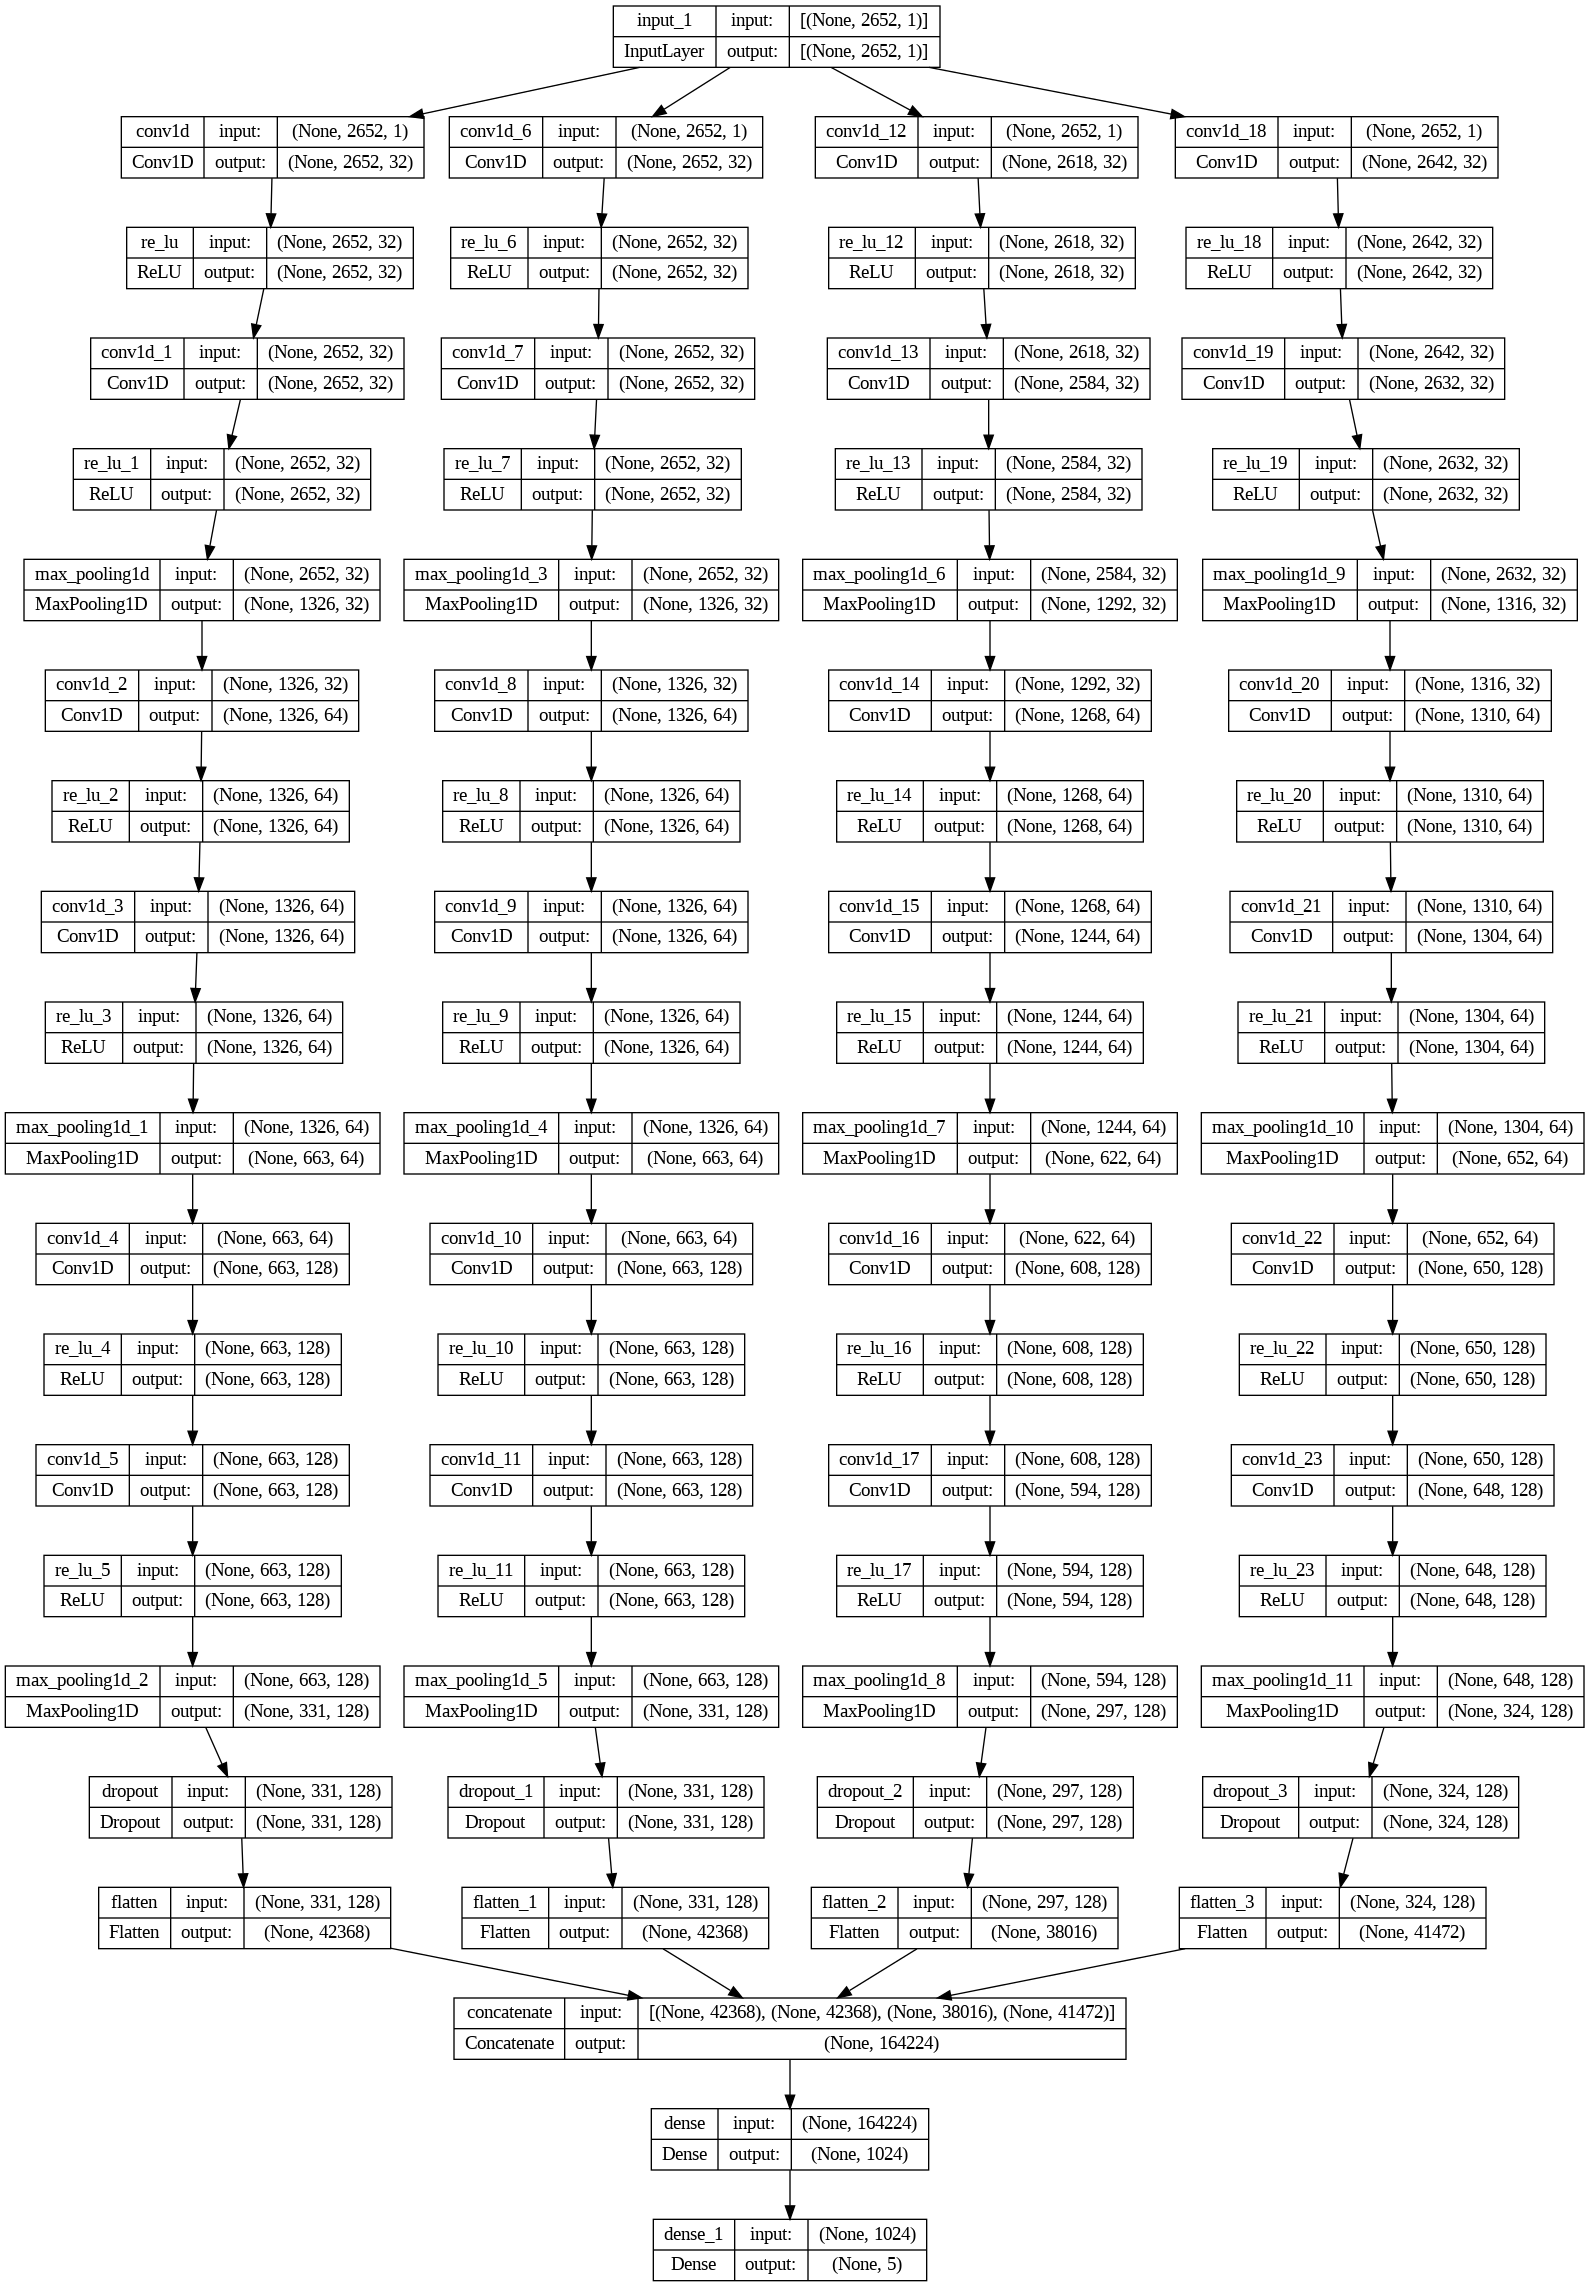

In [16]:
from tensorflow import math
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  elif epoch%3 == 0:
    return lr*0.9
  """else:
    return lr * math.exp(-0.1)"""


#fit model
from tensorflow.keras import optimizers
opt=  optimizers.AdamW(global_clipnorm=1,jit_compile=True)     #RMSprop(1e-3,global_clipnorm=1,jit_compile=True)
batch_size = 64
early_stop = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=25,
    verbose=0,
    mode='max',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)
lr_scheduler = LearningRateScheduler(scheduler)
terminate = TerminateOnNaN()
model = get_model(opt)
plot_model(model,show_shapes=True)


In [17]:
history = model.fit(X_train,y_train,epochs=80,validation_split=0.20,callbacks=[early_stop,terminate],batch_size=batch_size) #,class_weight = {0.0: 4.463,1.0: 0.5631} #class_weight=class_weight_dict

Epoch 1/80
5/5 [==============================] - 106s 9s/step - loss: 16308.5342 - accuracy: 0.2456 - val_loss: 2.6721 - val_accuracy: 0.3521
Epoch 2/80
5/5 [==============================] - 12s 2s/step - loss: 12.3395 - accuracy: 0.3737 - val_loss: 1.6705 - val_accuracy: 0.3239
Epoch 3/80
5/5 [==============================] - 13s 3s/step - loss: 1.2853 - accuracy: 0.4270 - val_loss: 1.1476 - val_accuracy: 0.5211
Epoch 4/80
5/5 [==============================] - 12s 2s/step - loss: 1.3392 - accuracy: 0.5125 - val_loss: 1.0131 - val_accuracy: 0.5211
Epoch 5/80
5/5 [==============================] - 12s 2s/step - loss: 1.0134 - accuracy: 0.5943 - val_loss: 1.1424 - val_accuracy: 0.5211
Epoch 6/80
5/5 [==============================] - 13s 3s/step - loss: 1.3775 - accuracy: 0.5836 - val_loss: 1.1859 - val_accuracy: 0.5775
Epoch 7/80
5/5 [==============================] - 12s 2s/step - loss: 0.9755 - accuracy: 0.6584 - val_loss: 1.2852 - val_accuracy: 0.5352
Epoch 8/80
5/5 [============

In [23]:
pred = model.predict(X_test,verbose=True)
pred = np.argmax(pred, axis=1)
pred

3/3 [==============================] - 1s 456ms/step


array([0, 4, 0, 4, 2, 4, 3, 3, 3, 2, 0, 1, 2, 2, 1, 2, 3, 1, 1, 1, 3, 3,
       3, 2, 0, 0, 1, 2, 1, 1, 1, 3, 0, 0, 0, 1, 0, 1, 0, 4, 3, 3, 1, 3,
       4, 3, 1, 0, 1, 0, 2, 3, 3, 3, 2, 2, 4, 3, 3, 2, 2, 4, 4, 2, 0, 2,
       0, 0, 4, 0, 1, 0, 2, 2, 0, 3, 2, 1, 2, 1, 2, 4, 3, 3, 3, 2, 3, 3])

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,ConfusionMatrixDisplay,roc_curve, auc
conf = confusion_matrix(y_test,pred)
report = classification_report(y_test,pred)

'f1 = f1_score(y_test,pred)\nprint(f"f1-score={f1}")\nfpr, tpr, threshold = roc_curve(y_test,pred)\n\nauc = auc(fpr,tpr)\ncurve = roc_curve(y_test,pred)\n\nplt.figure(figsize=(5,5), dpi=100)\nplt.plot(fpr,tpr,linestyle=\'-\', label=\'ROC (auc =%0.3f)\'% auc)\n\nplt.xlabel(\'False Positive Rate --->\')\nplt.ylabel(\'True Positive Rate --->\')\n\nplt.show()'

In [25]:
print(conf)

[[18  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 15  2  1]
 [ 0  0  1 16  1]
 [ 0  0  4  5  8]]


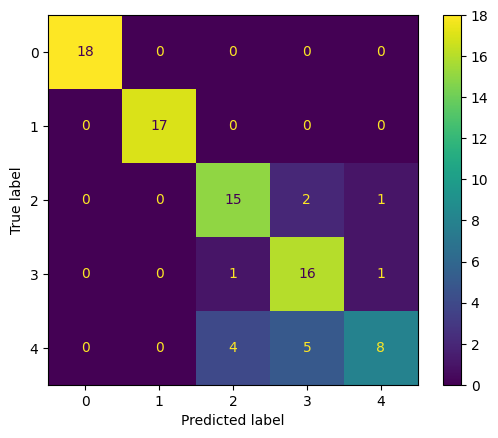

In [26]:
disp = ConfusionMatrixDisplay(conf)
disp.plot()


In [22]:
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        17
         2.0       0.75      0.83      0.79        18
         3.0       0.70      0.89      0.78        18
         4.0       0.80      0.47      0.59        17

    accuracy                           0.84        88
   macro avg       0.85      0.84      0.83        88
weighted avg       0.85      0.84      0.83        88

